## Taller árboles y redes
#### Diana Liceth Bayona Patiño

### Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt

### Importar datos

In [2]:
base = pd.read_csv('C:/Users/diana/Downloads/trade_2013-flows.csv', 
                 sep = ',', thousands=',', decimal='.')
base.head()

,flow,country1,country2,currency,amount
0,Import,AUS,AUS,USD,87889909.0
1,Import,AUT,AUS,USD,7412391.0
2,Import,BEL,AUS,USD,145663801.0
3,Import,CAN,AUS,USD,145634019.0
4,Import,CZE,AUS,USD,14055716.0


Los datos fueron tomados de GitHub del usuario *chatox*, la base de datos está conformada por 5 atributos 11609 items y presenta los flujos de importaciones y exportaciones que hubieron entre diferentes países en el año 2013. https://github.com/chatox/networks-science-course/tree/master/practicum/data

In [3]:
base['currency'].value_counts()

USD     11447
2013      162
Name: currency, dtype: int64

In [4]:
Base = base[base['currency']=="USD"]
Base.shape

(11447, 5)

In [5]:
Base = Base[Base['flow']=="Import"]
Base.shape

(5649, 5)

In [6]:
basef=Base[Base.country2.isin(["COL", "PER", "BRA", "ECU"])]
basef.shape

(113, 5)

In [7]:
basef.head()

,flow,country1,country2,currency,amount
2862,Import,AUS,BRA,USD,46365323.0
2863,Import,AUT,BRA,USD,39214418.0
2864,Import,BEL,BRA,USD,264807235.0
2865,Import,CAN,BRA,USD,293056166.0
2866,Import,CZE,BRA,USD,23416394.0


In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
basef['amount'].describe()

count          113.000
mean     126939201.177
std      320696012.515
min          73583.000
25%        4291500.000
50%       23416394.000
75%       75980524.000
max     2296116667.000
Name: amount, dtype: float64

Se ha realizado una depuración de la base de datos, en donde inicialmente se identificaron dos tipos de moneda "USD" y "2013", por lo cual se seleccionan unicamente las observaciones con moneda "USD", así mismo el análisis se va a enfocar en las importaciones y en 4 países de américa latina debido al alto volumen de datos y a que se tienen altos problemas de oclusión cuando se incluyen todos los datos. A continuación un ejemplo de un red neuronal interactiva con todos los países.

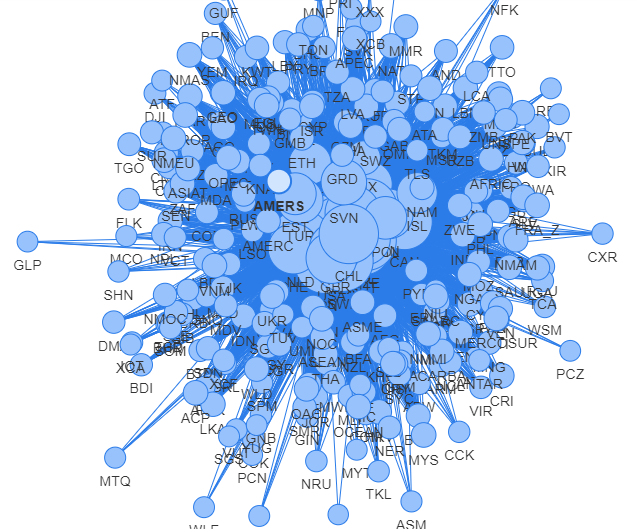

### Red interactiva

In [9]:
sources = basef['country1']
targets = basef['country2']
weights = basef['amount']

df_net = Network(height='750px', 
                  width='85%', 
                  notebook = True)

edge_data = zip(sources, targets, weights)

In [10]:
for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    df_net.add_node(src, src, title=src)
    df_net.add_node(dst, dst, title=dst)
    df_net.add_edge(src, dst, value=w)

neighbor_map = df_net.get_adj_list()

for node in df_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])


df_net.show('df_net.html')


Una imagén del diagrama de red dirigida por la fuerza:

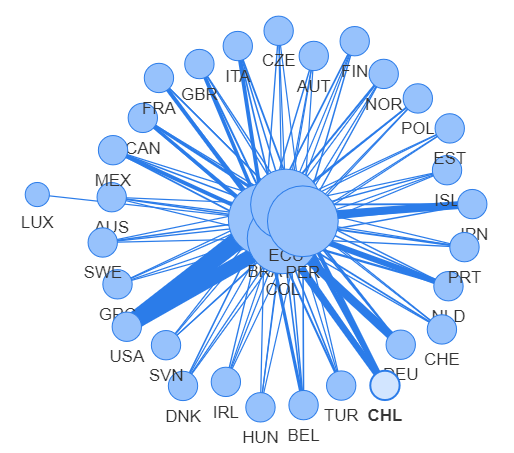

**¿Qué?**

Los datos que se tienen son una tabla de tipo **Red** ya que está conformada por nodos y enlaces, en donde como nodos se tienen los países (atributos country1 y country2) y como enlaces se tiene la relación que hay entre estos, para este caso esa relación determina si hubieron flujos de importación en el 2013 entre los países 1 y 2. Así de country2 se seleccionaron sólo 4 países de suramérica Brasil, Colombia, Ecuador y Perú que importaron bienes y servicios de 29 países (country1).

**¿Por qué?**

La gráfica de red en sus acciones **analiza y presenta** ya que el propósito es mostrar la relación que tienen los diferentes países con respecto a las importaciones en el año 2013, por lo cual se evidencian los países que importaron bienes a country2.

El diagrama de enlaces de nodos tiene como tarea la comprensión de la **topología de la red** ya que se pueden identificar las 
conexiones directas e indirectas entre los nodos, para este caso se puede identificar los países que importaron bienes y servicios a Brasil, Colombia, Ecuador y Perú en el año 2013. Se puede evidenciar que Brasil es el país que importó bienes de todos los países, esto se puede deber a que de los 4 países Brasil presenta la economía más grande además de tener una densidad poblacional superior a los demás; mientras que Colombia, Ecuador y Perú presenta tanto una economía como densidad poblacional similar por lo cual tuvieron flujos de importación en 28 países.


**¿Cómo?**

A partir de la visualización se puede evidenciar que debido a su interactividad esta está **Manipulada** de forma que se puede **seleccionar** un nodo y está resalta los enlaces y nodos con los que tiene una conexión lo que permite identificar con mayor facilidad los países que  tuvieron importaciones en el 2013.

**Marcas**

- Marca de puntos para los nodos que en este cado son los países.
- Marca de lineas para los enlaces que representa la relación entre los países.

**Canales**

- Canal de tamaño de área para identificar los países con mayor cantidad de relaciones, en este caso los países que tuvieron más importaciones los cuales son Brasil, Colombia, Ecuador y Perú.

**Reglas generales**

Para este caso no fueron tomadas en cuenta las reglas relacionadas con el 3D debido a que la gráfica presentada se encuentra en 2D. La visualización de red dirigida por la fuerza cumple con las siguientes reglas:

- 2D justificado
- Primero la función, luego la forma: La interactividad permite que la gráfica sea más legible para el usuario, además de que tiene un texto legible cuando se seleccionan los nodos para identificar sus relaciones por lo cual la visualización cumple con su objetivo de mostrar la relación de los flujos de importaciones entre los países, sin embargo hay que destacar que gran parte de esto se debe a la interactividad ya que de lo contrario se tendría problemas de oclusión.
- Se requiere capacidad de respuesta: La gráfica no tiene problemas con el tiempo de procesamiento ya que no se tiene un volumen alto de datos.

No cumple con las reglas de:

- Overview, zoom y filtro: La gráfica no profundiza sino que hace un overview de los datos, aunque con ayuda de la interactividad se logra tener un zoom de la red.
- Resolución sobre la inmersión: A pesar de que a resolución no baja cuando el usuario interactua con la gráfica, no se puede identificar de manera clara las relaciones incluso usando la interactividad debido a que los datos están muy concentrados en los cuatro países y aunque se intenta acomodar los enlaces con el objetivo de generar una distancia para poder tener una mejor visualización, esta vuelve a su forma original.


**Mejoras visibles**

Con respecto a las marcas no haría alguna mejora, sin embargo con el canal haría la mejora de color para poder identificar de manera más fácil las relaciones entre los países cuando estos se seleccionan ya que a pesar de ser un azul más oscuro no se logra ver una diferencia notable por la concentración de los nodos. Así mismo hubiera empleado la semántica de proximidad considerando el valor de las importaciones para identificar los países con los cuales se realizaron importaciones por valores más altos. También hubiera presentado las aristas largas ya que así se podían identificar más las relaciones y se evitaba la concentración de nodos que generaba problemas de oclusión, no obstante se esperaba que por medio de la interactividad los enlaces se pudieran acomodar pero estos volvían a su forma original. 

Al emplear un algoritmo de organización de los nodos se tienen problemas de oclusión, por lo cual es díficil identificar el nombre de los países y la relación entre los diferentes países.

C:\Users\diana\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


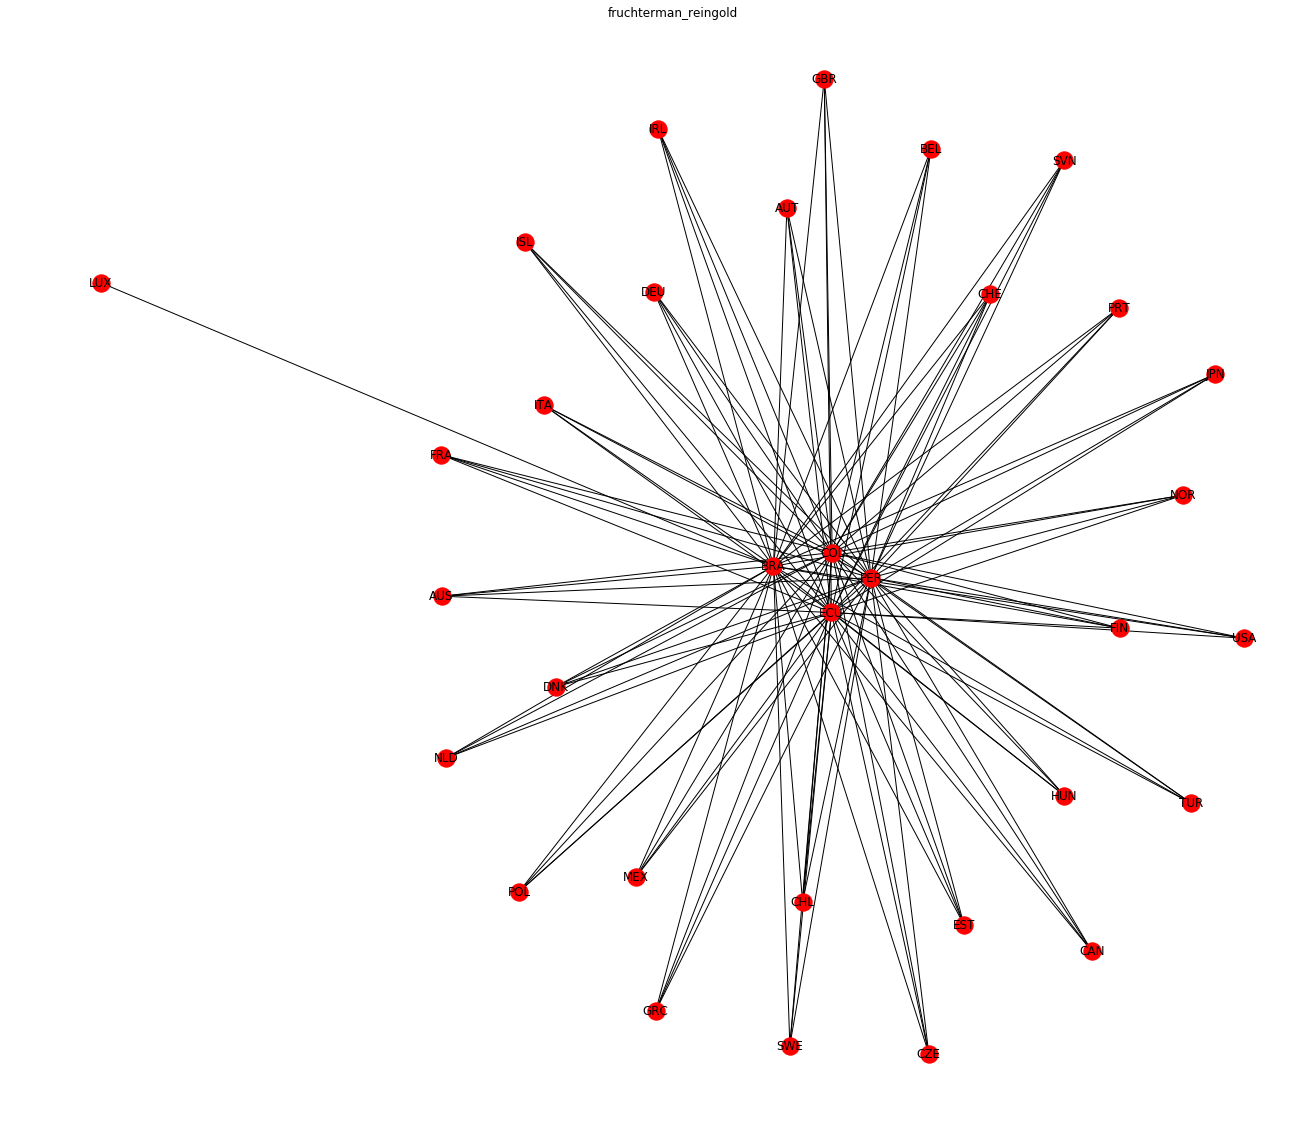

In [13]:
G= nx.from_pandas_edgelist(basef, 'country1', 'country2', create_using=nx.Graph() )
plt.figure(figsize=(50,20))
plt.subplot(121) #subplot(nrows, ncols, plot_number) 
nx.draw(G, with_labels=True, 
        pos=nx.fruchterman_reingold_layout(G))
plt.title("fruchterman_reingold")

plt.show()

Una mejora posible es la matriz de adyacencia ya que con esta se soluciona los problemas de oclusión y se puede identificar de manera fácil las relaciones de importaciones entre los países, en donde Colombia, Ecuador y Perú no importaron productos de Luxemburgo en el 2013. Mientras que Brasil importó productos de todos los países.

Esta también presenta datos de tabla tipo **red**, en donde los nodos son representados por atributos catégoricos que son los países (country1 y country2) y el atributo cuantitativo es sí existe relación de importaciones entre estos. Al igual que la red, sus acciones **analiza y presenta** ya que el propósito es mostrar la relación que tienen los diferentes países con respecto a las importaciones en el año 2013 y su tarea es **ver relaciones de conexión y dependencia** entre las naciones.

Usa marcas de área para los enlaces, los canales son la posición espacial, tanto horizontal como vertical de los nodos para los nodos y un canal de color que permite identificar los flujos de importaciones.

Cumple las reglas de 2D justificado, primero la función luego la forma y resolución sobre la inmersión (las demás no son consideradas ya que no es interactiva ni 3D), debido a que la gráfica no oculta información, es legible, no hay peligros con la distorsión de la perspectiva, no hay problemas de oclusión, el diseño es efectivo ya que logra mostrar las relaciones de importaciones entre los países y se tienen una buena resolución de la información.

### Matriz de adyacencia

In [14]:
crossdf = pd.crosstab(basef['country1'],basef['country2'],dropna=False)
crossdf

country2,BRA,COL,ECU,PER
country1,,,,
AUS,1,1,1,1
AUT,1,1,1,1
BEL,1,1,1,1
CAN,1,1,1,1
CHE,1,1,1,1
CHL,1,1,1,1
CZE,1,1,1,1
DEU,1,1,1,1
DNK,1,1,1,1


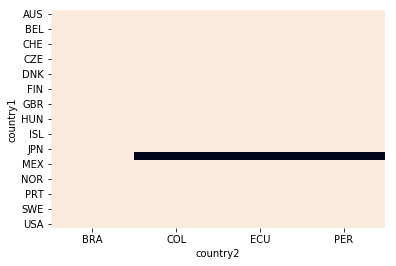

In [15]:
sns.heatmap(crossdf,cbar=False)

Con la misma base de datos se podía realizar un TreeMap con el objetivo de analizar el valor en dólares de las importaciones y exportaciones por cada uno de los países.

In [17]:
import plotly.express as px

Base = base[base['currency']=="USD"]
basef=Base[Base.country2.isin(["COL", "PER", "BRA", "ECU"])]

fig = px.treemap(basef, path=['country2', 'flow'], 
                 values='amount', 
                 color='flow')
  
fig.show()

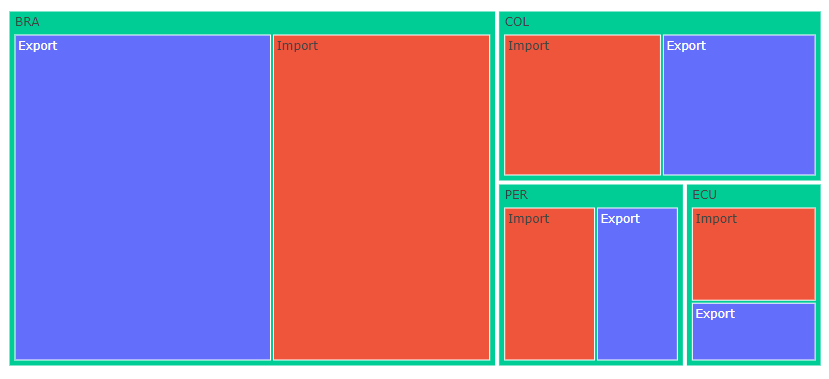